In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data

df_iris_sklearn = load_iris()

X = pd.DataFrame(data = df_iris_sklearn.data,
                 columns = df_iris_sklearn.feature_names)

y = df_iris_sklearn.target

display(X.head(), y[:5])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0])

In [3]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = y, 
                                                    shuffle = True)

# standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# build model
model = keras.Sequential([
    keras.layers.Dense(10, input_dim = 4, activation = 'relu', kernel_initializer = 'he_normal', 
                       kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(7, activation = 'relu', kernel_initializer = 'he_normal', 
                       kernel_regularizer = keras.regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation = 'relu', kernel_initializer = 'he_normal', 
                       kernel_regularizer = keras.regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    keras.layers.Dense(3, activation = 'softmax')
])

# compile model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

In [5]:
# fit model
history = model.fit(X_train_scaled, y_train, batch_size = 16, epochs = 500)
history

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2937 - loss: 1.6085
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2798 - loss: 1.4718
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2995 - loss: 1.7364
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.5091
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.4402
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.4468
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3790 - loss: 1.2918
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4137 - loss: 1.3045
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3727 - loss: 1.3361
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 1.2939
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4734 - loss: 1.2633
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4913 - loss: 1.3041 


In [6]:
# evaluate model
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 1.0000 - loss: 0.1225


[0.12248366326093674, 1.0]

In [7]:
def show_train_summary(model_name, history, epochs):
    """
    Visualizes the training summary for a model's performance over epochs using an interactive scatter plot.

    Args:
        model_name (str): The name of the model, used in the plot title.
        history (keras.callbacks.History): The history object returned by model.fit(), containing training metrics.
        epochs (list): A list of epoch numbers, typically ranging from 1 to the total number of epochs.

    Returns:
        None: Displays the plot in an interactive format.
    """
    # Convert training history to a DataFrame for easier manipulation
    history_dict = history.history
    data = {
        'Epoch': epochs,
        'Train Accuracy': history_dict["accuracy"],
        'Train Loss': history_dict["loss"]
    }

    df = pd.DataFrame(data)

    # Melt the DataFrame to make it suitable for Plotly Express
    df_melted = df.melt(id_vars = 'Epoch', value_vars = ['Train Accuracy', 'Train Loss'], 
                        var_name = 'Metric', value_name = 'Value')

    # Create the scatter plot using px.scatter
    fig = px.scatter(df_melted, x = 'Epoch', y = 'Value', color = 'Metric',
                     title = f"Model {model_name} Training Summary",
                     labels = {'Value': 'Value', 'Metric': 'Metric'})

    # Customize the layout
    fig.update_layout(
        height = 600,
        width = 1100,
        title_x = 0.5,
        title_xanchor = 'center',
        legend = dict(
            orientation = 'h',
            yanchor = 'bottom',
            y = -0.2,
            xanchor = 'center',
            x = 0.5
        )
    )

    # Show the plot
    fig.show()

show_train_summary('Dense', history, list(range(1, 500 + 1)))

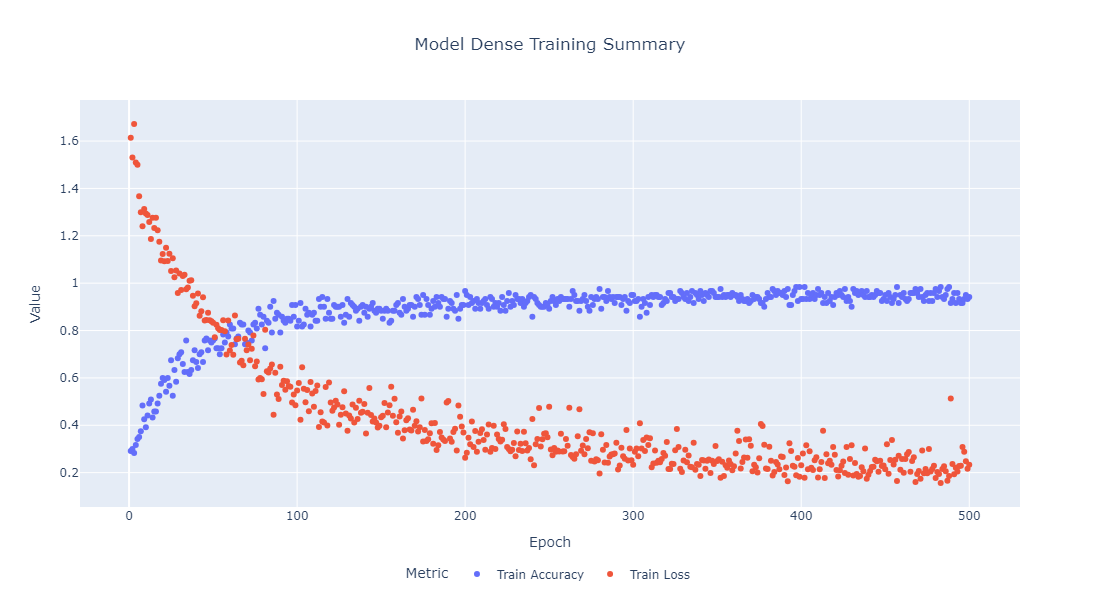

Training Accuracy: The accuracy starts at a lower value but quickly rises within the first 100 epochs, showing a rapid learning phase. After reaching approximately 0.9, the accuracy stabilizes and continues to oscillate slightly around this value. This suggests that the model is approaching its optimal accuracy level and is well-tuned for the dataset.

Training Loss: The loss begins at a high value and decreases quickly during the initial epochs, indicating effective learning. It continues to decline gradually, with minimal fluctuation around a low value as training progresses, suggesting good model convergence.

Overall, the model shows a good fit.

In [8]:
# predict test data
y_pred     = model.predict(X_test_scaled)
y_pred_max = np.argmax(y_pred, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred_max))
print("F1-score:", f1_score(y_test, y_pred_max, average = None))

Accuracy: 1.0
F1-score: [1. 1. 1.]


In [12]:
# create classification report
report = classification_report(y_test, y_pred_max)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The classification report shown in the image provides a detailed breakdown of the model's performance across three classes (0, 1, and 2) in terms of precision, recall, and F1-score.

- For each class (0, 1, and 2), the precision, recall, and F1-score are all perfect scores of 1.00. This indicates that the model made no mistakes in predicting the classes in the test dataset.
- Accuracy: The overall accuracy of the model is 100%, meaning all predictions were correct.
- Macro Average: The macro average (average of the metrics without considering class support) for precision, recall, and F1-score is 1.00, showing balanced performance across classes.
- Weighted Average: The weighted average (taking into account the support for each class) is also 1.00, confirming high performance regardless of class size.